# Sentiment analysis on IMDB review data

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn import metrics

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
df_imbd = pd.read_csv("imdb.csv")
df_imbd.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


## Supervised learning using Count Vectorizer and TF-IDF with Logistic Regression and Bernoulli Naive Bayes method

Convert Dependent variable into numeric value

In [4]:
df_imbd.Class[df_imbd.Class == 'P'] = 1
df_imbd.Class[df_imbd.Class == 'N'] = 0
df_imbd = df_imbd.dropna(how = 'any')
df_imbd.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


Train Test data split using SKlearn library

In [5]:
from sklearn.model_selection import train_test_split
X = df_imbd.Text
Y = df_imbd.Class
Corpus_train, Corpus_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(Corpus_train.shape,Corpus_test.shape,Y_train.shape,Y_test.shape)


(6374,) (2125,) (6374,) (2125,)


Using binary `CountVectorizer()` and a binary `TfidfVectorizer()`

In [6]:
#CountVectorizer with English stopwords and N-gram: 1-2
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1,2), binary = True)
X_train_CV = vectorizer.fit(Corpus_train).transform(Corpus_train)
X_test_CV = vectorizer.transform(Corpus_test)

print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(X_train_CV)))
print("X_test: \n{}".format(repr(X_test_CV)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 568521
X_train:
<6374x568521 sparse matrix of type '<class 'numpy.int64'>'
	with 1252917 stored elements in Compressed Sparse Row format>
X_test: 
<2125x568521 sparse matrix of type '<class 'numpy.int64'>'
	with 255424 stored elements in Compressed Sparse Row format>
Number of features: 568521


In [7]:
#TfidfVectorizer with English stopwords and N-gram: 1-2
vectorizer_TF = TfidfVectorizer(stop_words="english", ngram_range=(1,2), binary = True)

X_train_TF = vectorizer_TF.fit(Corpus_train).transform(Corpus_train)
X_test_TF = vectorizer_TF.transform(Corpus_test)

print("Vocabulary size: {}".format(len(vectorizer_TF.vocabulary_)))
print("X_train:\n{}".format(repr(X_train_TF)))
print("X_test: \n{}".format(repr(X_test_TF)))

feature_names = vectorizer_TF.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 568521
X_train:
<6374x568521 sparse matrix of type '<class 'numpy.float64'>'
	with 1252917 stored elements in Compressed Sparse Row format>
X_test: 
<2125x568521 sparse matrix of type '<class 'numpy.float64'>'
	with 255424 stored elements in Compressed Sparse Row format>
Number of features: 568521


Using `LogisticRegression()` and `BernoulliNB()` models for Supervised classification of Count Vectorizer as well TF-IDF models

In [8]:
Y_train=Y_train.astype('int')

# Logistic Regression 
model_LR_CV = LogisticRegression()
model_LR_CV.fit(X_train_CV, Y_train)
model_LR_TF = LogisticRegression()
model_LR_TF.fit(X_train_TF, Y_train)


# Bernoulli Naive Bayes
model_BNB_CV = BernoulliNB()
model_BNB_CV.fit(X_train_CV, Y_train)
model_BNB_TF = BernoulliNB()
model_BNB_TF.fit(X_train_TF, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [9]:
LR_CV_pred = model_LR_CV.predict(X_test_CV)
AUC_LR_CV = metrics.roc_auc_score(LR_CV_pred, Y_test)
LR_CV_fpr, LR_CV_tpr, _ = metrics.roc_curve(LR_CV_pred, Y_test)

LR_TF_pred = model_LR_TF.predict(X_test_TF)
AU_LR_TF = metrics.roc_auc_score(LR_TF_pred, Y_test)
LR_TF_fpr, LR_TF_tpr, _ = metrics.roc_curve(LR_TF_pred, Y_test)

BNB_CV_pred = model_BNB_CV.predict(X_test_CV)
AUC_BNB_CV = metrics.roc_auc_score(BNB_CV_pred, Y_test)
BNB_CV_fpr, BNB_CV_tpr, _ = metrics.roc_curve(BNB_CV_pred, Y_test)

BNB_TF_pred = model_BNB_TF.predict(X_test_TF)
AUC_BNB_TF = metrics.roc_auc_score(BNB_TF_pred, Y_test)
BNB_TF_fpr, BNB_TF_tpr, _ = metrics.roc_curve(BNB_TF_pred, Y_test)

print(AUC_LR_CV ,AU_LR_TF ,AUC_BNB_CV ,AUC_BNB_TF)
print("Logistic Regression with Count Vectorizer = ",AUC_LR_CV )
print("Logistic Regression with TfidfVectorizer = ",AU_LR_TF )
print("BernoulliNB with Count Vectorizer = ",AUC_BNB_CV)
print("BernoulliNB with TfidfVectorizer = ",AUC_BNB_TF )

0.8670652683633884 0.8691621651787692 0.862059642154225 0.862059642154225
Logistic Regression with Count Vectorizer =  0.8670652683633884
Logistic Regression with TfidfVectorizer =  0.8691621651787692
BernoulliNB with Count Vectorizer =  0.862059642154225
BernoulliNB with TfidfVectorizer =  0.862059642154225


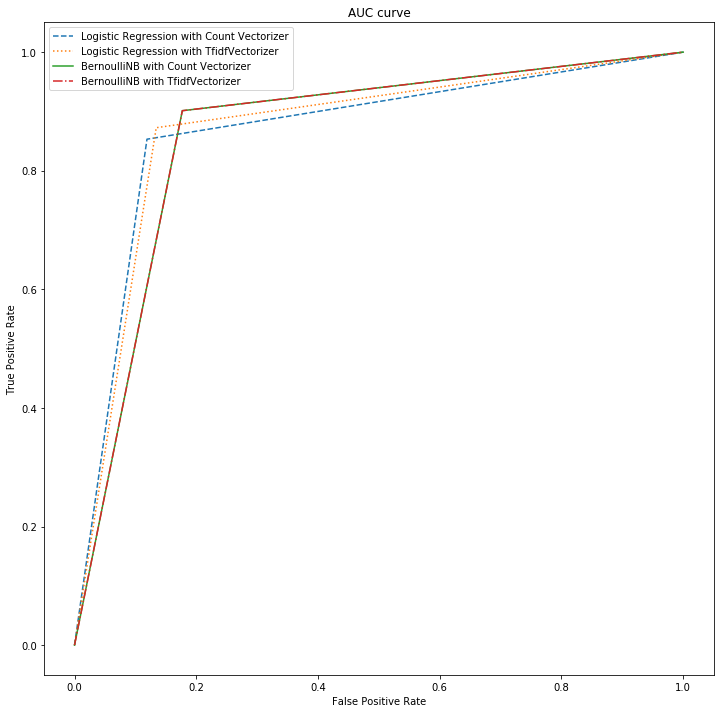

In [10]:
# plot the roc curve for the model
plt.plot(LR_CV_fpr, LR_CV_tpr, linestyle='--', label='Logistic Regression with Count Vectorizer')
plt.plot(LR_TF_fpr, LR_TF_tpr, linestyle=':', label='Logistic Regression with TfidfVectorizer')
plt.plot(BNB_CV_fpr, BNB_CV_tpr, linestyle='-', label='BernoulliNB with Count Vectorizer')
plt.plot(BNB_TF_fpr, BNB_TF_tpr, linestyle='-.', label='BernoulliNB with TfidfVectorizer')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title("AUC curve")
plt.show()

Logistic Regression with Count Vectorizer performs better Sentiment analysis than other models with AUC of 0.8693

## Unsupervised learning

In [0]:
#Perform TF-IDF on whole dataset
TFIDF_matrix = vectorizer_TF.fit(X).transform(X)
Vectorizer_matrix = vectorizer.fit(X).transform(X)

In [0]:
num_clusters = 2
k_means_vect = KMeans(n_clusters=num_clusters)
k_means_vect.fit(X_train_CV)
clusters_vect = k_means_vect.labels_.tolist()

In [0]:
k_means_TFIDF = KMeans(n_clusters=num_clusters)
k_means_TFIDF.fit(X_train_TF)
clusters_TFIDF = k_means_TFIDF.labels_.tolist()

In [14]:
Y_train = Y_train.astype('int')
Y_neg = [int(not(x)) for x in Y_train.to_list()]
dict_vect = {'Name': Corpus_train.tolist(), 'Cluster': clusters_vect, 'Neg Class': (Y_neg), 'Class': Y_train.tolist()}
frame_vect = pd.DataFrame(dict_vect, index = [clusters_vect])
frame_vect.sample(10)
#Negate of the clusters are considered as clustering only outputs as two separate classes and not as positive or negative

,Name,Cluster,Neg Class,Class
0,'Just like wine Johnny Dangerously gets better...,0,0,1
0,'Why such a generic title? Santa Claus??? So b...,0,1,0
0,'Deanna Durbin Nan Grey and Barbara Read are T...,0,0,1
0,'I saw this film earlier today and I was amaze...,0,0,1
0,'What has Ireland ever done to film distribute...,0,1,0
0,'What a brilliant film. I will admit it is ver...,0,0,1
0,'Based on Robert Louis Stevensons St. Ives the...,0,0,1
0,'Sorry but every time I see a film wherein a w...,0,1,0
0,'The opening flourishes left me purring with d...,0,0,1
0,'I saw this film at a time when I was timidly ...,0,0,1


In [15]:
dict_TFIDF = {'Name': Corpus_train.tolist(), 'Cluster': clusters_TFIDF, 'Neg Class': (Y_neg), 'Class': Y_train.tolist()}
frame_TFIDF = pd.DataFrame(dict_TFIDF, index = [clusters_TFIDF])
frame_TFIDF.sample(10)

,Name,Cluster,Neg Class,Class
0,'Since musicals have both gone out of fashion ...,0,0,1
0,' An old man works as a janitor in a mental ho...,0,0,1
1,'Its a strange yet somehow impressive story ab...,1,0,1
1,'It is such a strange movie you can call it aw...,1,1,0
0,'I saw this movie twice through a pentecostal ...,0,1,0
1,'Unlike endemol USAs two other current game sh...,1,1,0
1,'I havent seen the first two - only this one w...,1,1,0
0,'Tremendous black--and-white nighttime cinemat...,0,0,1
1,'I registered just to make this comment (which...,1,1,0
1,'Stupid Stupid Stupid. I think that Angelina J...,1,0,1


In [24]:
Y_train = Y_train.astype('int')
auc_neg_vect = metrics.accuracy_score(Y_neg, clusters_vect)
auc_vect = metrics.accuracy_score(Y_train, clusters_vect)
print("Accuracy score on output clusters with Count Vectorization = ", auc_vect)
print("Accuracy score on output clusters negated with Count Vectorization = ", auc_neg_vect)

Accuracy score on output clusters with Count Vectorization =  0.5029808597427048
Accuracy score on output clusters negated with Count Vectorization =  0.49701914025729527


In [25]:
auc_neg_TFIDF = metrics.accuracy_score(Y_neg, clusters_TFIDF)
auc_TFIDF = metrics.accuracy_score(Y_train, clusters_TFIDF)
print("Accuracy score on output clusters with Count Vectorization = ", auc_TFIDF)
print("Accuracy score on output clusters negated with Count Vectorization = ", auc_neg_TFIDF)

Accuracy score on output clusters with Count Vectorization =  0.29965484781926577
Accuracy score on output clusters negated with Count Vectorization =  0.7003451521807342


In [23]:
Y_test = Y_test.astype('int')
Y_pred_TFIDF_cluster = k_means_TFIDF.predict(X_test_TF)
if (auc_neg_vect > auc_vect):
  Y_test_neg = [int(not(x)) for x in Y_test.to_list()]
  test_vect_auc = metrics.accuracy_score(Y_test_neg, Y_pred_TFIDF_cluster)
else:
  test_vect_auc = metrics.accuracy_score(Y_test, Y_pred_TFIDF_cluster)
print("Test accuracy of TFIDF= ",test_vect_auc )

Test AUC of TFIDF=  0.7232941176470589


In [22]:
Y_pred_vect_cluster = k_means_vect.predict(X_test_CV)
if (auc_neg_vect > auc_vect):
  Y_test_neg = [int(not(x)) for x in Y_test.to_list()]
  test_vect_auc = metrics.accuracy_score(Y_test_neg, Y_pred_vect_cluster)
else:
  test_vect_auc = metrics.accuracy_score(Y_test, Y_pred_vect_cluster)
print("Test Accuracy of Count Vectorizer = ",test_vect_auc )

Test AUC of Count Vectorizer =  0.5049411764705882


# Using NLTK

In [0]:
def vader_analysis(input_col, output_col, dataframe):
  dataframe[output_col] = dataframe.apply(lambda _: '-', axis=1)

  for num, text in enumerate(dataframe[input_col]):
    sentiment_original = analyser.polarity_scores(text)
    if sentiment_original['neg'] > sentiment_original['pos']:
      dataframe[output_col].iloc[num] = 0
      #print("num = {}, score = {}" .format(num,0) )
    else:
      dataframe[output_col].iloc[num] = 1 
      #print("num = {}, score = {}" .format(num,1) )

  return df_imbd

df_imbd = vader_analysis("Text", "vader_score", df_imbd)

In [21]:
df_imbd["Class"] = df_imbd["Class"].astype('int')
df_imbd["vader_score"] = df_imbd["vader_score"].astype('int')
vader_acc = metrics.accuracy_score(df_imbd["Class"],df_imbd["vader_score"])
print("Accuracy of NLTK sentiment Analyser on actual Class= ",vader_acc )

Accuracy of NLTK sentiment Analyser on actual Class=  0.6865513589834098
